In [1]:
#Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install joypy
from joypy import joyplot
%matplotlib inline
from math import pi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Downloading first Dataframe
from google.colab import files
uploaded = files.upload()
import io
spotify = pd.read_csv(io.BytesIO(uploaded['Spotify_final_dataset 2.csv']))

Saving Spotify_final_dataset 2.csv to Spotify_final_dataset 2.csv


In [3]:
#Downloading second Dataframe
from google.colab import files
uploaded = files.upload()
import io
ChartData = pd.read_csv(io.BytesIO(uploaded['spotify_top_charts_22.csv']))

Saving spotify_top_charts_22.csv to spotify_top_charts_22.csv


In [4]:
spotify.columns

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')

In [5]:
ChartData.columns

Index(['uri', 'artist_names', 'track_name', 'peak_rank', 'weeks_on_chart',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

In [6]:
#Joining DataFrames Together
ChartData['artist_names']=ChartData['artist_names']+ " " #To make sure artist names match up
Mergeddf=pd.merge(spotify, ChartData, left_on = ['Song Name','Artist Name'], right_on = ['track_name', 'artist_names'], how = 'inner' )
Mergeddf

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,uri,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399,spotify:track:285pBltuF7vW8TeWk8hdRR,...,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,83.903,4,239836
1,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487,spotify:track:68Dni7IE4VyPkTOH9mRWHr,...,10,-8.492,0,0.3390,0.32400,0.000000,0.0534,100.028,4,292799
2,6,Travis Scott,goosebumps,1995,4.0,8,0,977275,672972704,spotify:track:6gBFPUFcJLzWGx4lenP6h2,...,7,-3.370,1,0.0484,0.08470,0.000000,0.1490,130.049,4,243837
3,7,The Weeknd,Blinding Lights,1100,233.0,1,(x11),2355059,644287953,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,...,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,171.005,4,200040
4,7617,The Weeknd,Blinding Lights,2,0.0,118,0,322566,585904,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,...,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,171.005,4,200040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,8943,Daddy Yankee,REMIX,1,0.0,131,0,293710,293710,spotify:track:65MqlYPOWReasKWcuCaOCW,...,1,-4.879,1,0.0547,0.03230,0.001200,0.1210,100.062,4,163680
328,9189,Daddy Yankee,RUMBATÓN,1,0.0,151,0,277811,277811,spotify:track:3XjN0mvFkQp1FMVM9Ro5hm,...,3,-4.034,0,0.0396,0.04710,0.000000,0.3500,95.004,4,248769
329,9692,Maluma,Sobrio,1,0.0,143,0,249769,249769,spotify:track:4HzqWEdAbzcVFDv0pvxV4w,...,5,-2.758,1,0.2230,0.13800,0.000000,0.1500,177.998,4,201181
330,9786,ROSALÍA,SAOKO,1,0.0,166,0,244578,244578,spotify:track:2FYGZDfsAnNsrm1gVbyKnG,...,0,-5.702,1,0.2650,0.79000,0.000024,0.4970,99.988,4,137533


In [7]:
#Clean up dataframe to only have necessary columns and be in the top 10
resultdf = Mergeddf.drop(columns =['Days', 'uri', 'artist_names', 'track_name', 'peak_rank'] , axis =1)
resultdf['Peak Position (xTimes)'] = resultdf['Peak Position (xTimes)'].str.strip('(').str.strip(')').str.strip('x') #Remove unneccessary values
resultdf['Peak Position (xTimes)']= resultdf['Peak Position (xTimes)'].astype(str).astype(int) #Change datatype from object
# Only looking at songs within top 10
resultdf.drop(resultdf.loc[resultdf['Peak Position'] > 10].index, inplace = True)
resultdf

,Position,Artist Name,Song Name,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,weeks_on_chart,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,2,Juice WRLD,Lucid Dreams,178.0,1,20,2127668,864832399,194,0.511,...,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,83.903,4,239836
1,4,J. Cole,No Role Modelz,6.0,7,0,659366,734857487,35,0.690,...,10,-8.492,0,0.3390,0.32400,0.000000,0.0534,100.028,4,292799
2,6,Travis Scott,goosebumps,4.0,8,0,977275,672972704,226,0.841,...,7,-3.370,1,0.0484,0.08470,0.000000,0.1490,130.049,4,243837
3,7,The Weeknd,Blinding Lights,233.0,1,11,2355059,644287953,121,0.514,...,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,171.005,4,200040
5,8,XXXTENTACION,Jocelyn Flores,44.0,2,1,3175206,624457164,216,0.872,...,0,-9.144,0,0.2420,0.46900,0.000004,0.2970,134.021,4,119133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,3593,The Weeknd,Dawn FM,1.0,3,1,1749943,5795533,1,0.280,...,9,-8.755,0,0.0370,0.67400,0.000058,0.4830,111.650,4,96240
276,3722,Taylor Swift,This Love (Taylor’s Version),1.0,8,0,1762459,5281749,2,0.470,...,4,-8.672,1,0.0349,0.30200,0.000000,0.0672,144.039,4,250100
281,3816,Drake,Intro,1.0,5,0,2633372,4975568,1,0.193,...,0,-31.160,0,0.0389,0.95500,0.880000,0.1170,125.501,3,36935
284,3934,Brent Faiyaz,LOOSE CHANGE,1.0,6,0,1032493,4524729,1,0.574,...,1,-8.931,0,0.0814,0.75300,0.000000,0.1470,84.975,4,226011


In [8]:
#Seperate new dataframe where current position is in top 10
smalldf= resultdf.drop(resultdf.loc[resultdf['Position'] > 10].index)
smalldf

,Position,Artist Name,Song Name,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,weeks_on_chart,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,2,Juice WRLD,Lucid Dreams,178.0,1,20,2127668,864832399,194,0.511,...,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,83.903,4,239836
1,4,J. Cole,No Role Modelz,6.0,7,0,659366,734857487,35,0.690,...,10,-8.492,0,0.3390,0.32400,0.000000,0.0534,100.028,4,292799
2,6,Travis Scott,goosebumps,4.0,8,0,977275,672972704,226,0.841,...,7,-3.370,1,0.0484,0.08470,0.000000,0.1490,130.049,4,243837
3,7,The Weeknd,Blinding Lights,233.0,1,11,2355059,644287953,121,0.514,...,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,171.005,4,200040
5,8,XXXTENTACION,Jocelyn Flores,44.0,2,1,3175206,624457164,216,0.872,...,0,-9.144,0,0.2420,0.46900,0.000004,0.2970,134.021,4,119133


In [9]:
#Useing value_counts + isin - to filter for artists that appear more than twice
v = resultdf['Artist Name'].value_counts()
newdf = resultdf[resultdf['Artist Name'].isin(v.index[v.gt(2)])]
newdf

,Position,Artist Name,Song Name,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,weeks_on_chart,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,2,Juice WRLD,Lucid Dreams,178.0,1,20,2127668,864832399,194,0.511,...,6,-7.230,0,0.2000,0.349000,0.000000,0.3400,83.903,4,239836
3,7,The Weeknd,Blinding Lights,233.0,1,11,2355059,644287953,121,0.514,...,1,-5.934,1,0.0598,0.001460,0.000095,0.0897,171.005,4,200040
6,11,Kendrick Lamar,HUMBLE.,152.0,1,67,4060034,606305588,96,0.908,...,1,-6.638,0,0.1020,0.000282,0.000054,0.0958,150.011,4,177000
7,12,Post Malone,Circles,163.0,1,38,3441328,598521764,134,0.695,...,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,120.042,4,215280
9,24,Olivia Rodrigo,good 4 u,187.0,1,53,4974833,454100610,45,0.563,...,9,-5.044,1,0.1540,0.335000,0.000000,0.0849,166.928,4,178147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,3548,Post Malone,Reputation,1.0,5,0,1337319,6034820,1,0.314,...,2,-5.726,1,0.0311,0.671000,0.000000,0.1810,180.119,4,248178
272,3593,The Weeknd,Dawn FM,1.0,3,1,1749943,5795533,1,0.280,...,9,-8.755,0,0.0370,0.674000,0.000058,0.4830,111.650,4,96240
276,3722,Taylor Swift,This Love (Taylor’s Version),1.0,8,0,1762459,5281749,2,0.470,...,4,-8.672,1,0.0349,0.302000,0.000000,0.0672,144.039,4,250100
281,3816,Drake,Intro,1.0,5,0,2633372,4975568,1,0.193,...,0,-31.160,0,0.0389,0.955000,0.880000,0.1170,125.501,3,36935


Text(0.5, 1.0, 'Danceability of songs peaked within top 10 based on Artist Name')

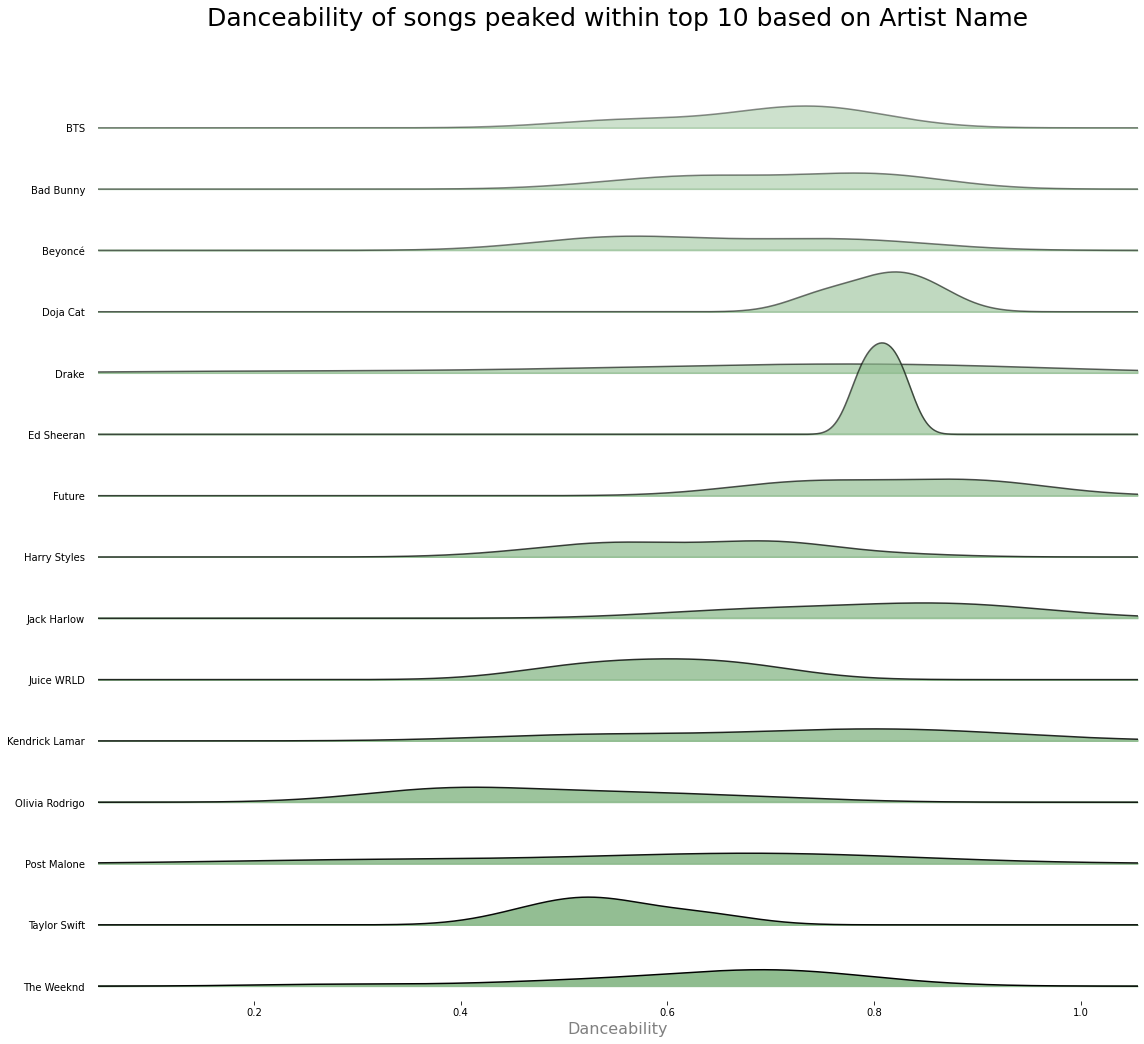

In [10]:
#ridgelineplot using newdf
#shows the danceability distribution of the songs that have been within the top 10, categorised by Artist Name
joyplot(newdf, by = 'Artist Name', column = 'danceability', color = 'darkseagreen', 
        figsize=(16,14), fade = True, xlabels=True)
plt.xlabel('Danceability', fontsize=16, color='grey', alpha=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.title("Danceability of songs peaked within top 10 based on Artist Name",fontsize = 25)

<ipython-input-11-ecfd43f1c988>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultdf["duration_ms"], color = 'green')


<Axes: xlabel='duration_ms', ylabel='Density'>

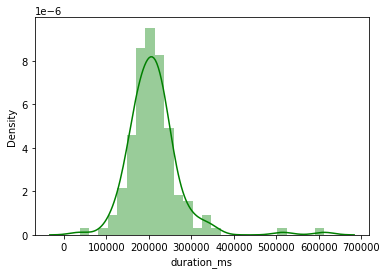

In [11]:
#Song duration Distribution for songs that have peaked within top 10
sns.distplot(resultdf["duration_ms"], color = 'green')

<Axes: xlabel='duration_ms', ylabel='Total Streams'>

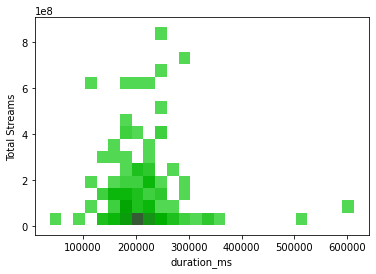

In [12]:
sns.histplot(data = resultdf, x="duration_ms", y ="Total Streams", kde = True, color = 'green')

In [13]:
smalldf.head()

,Position,Artist Name,Song Name,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,weeks_on_chart,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,2,Juice WRLD,Lucid Dreams,178.0,1,20,2127668,864832399,194,0.511,...,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,83.903,4,239836
1,4,J. Cole,No Role Modelz,6.0,7,0,659366,734857487,35,0.690,...,10,-8.492,0,0.3390,0.32400,0.000000,0.0534,100.028,4,292799
2,6,Travis Scott,goosebumps,4.0,8,0,977275,672972704,226,0.841,...,7,-3.370,1,0.0484,0.08470,0.000000,0.1490,130.049,4,243837
3,7,The Weeknd,Blinding Lights,233.0,1,11,2355059,644287953,121,0.514,...,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,171.005,4,200040
5,8,XXXTENTACION,Jocelyn Flores,44.0,2,1,3175206,624457164,216,0.872,...,0,-9.144,0,0.2420,0.46900,0.000004,0.2970,134.021,4,119133


In [14]:
smalldf.columns

Index(['Position', 'Artist Name', 'Song Name', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams', 'weeks_on_chart', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'tempo', 'time_signature', 'duration_ms'],
      dtype='object')

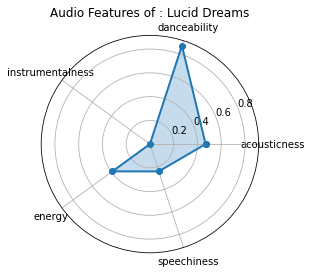

In [15]:
#Radar chart for top streamed songs. songs within top 10
labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']) #The different axis on radar chart
song = smalldf.loc[5,labels].values #Pick whick song we want to visualise

#Set angle of polar axis and draw closed radar plot
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart 1
fig=plt.show()
ax = plt.subplot(111, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Audio Features of : ' + smalldf.at[0,'Song Name'])
ax.grid(True)

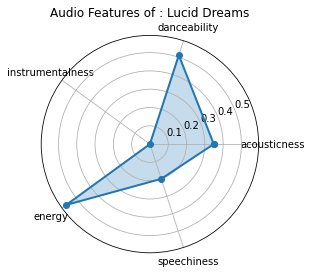

In [16]:
#Radar chart for top streamed songs. songs within top 10
labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']) #The different axis on radar chart
song = smalldf.loc[0,labels].values #Pick whick song we want to visualise

#Set angle of polar axis and draw closed radar plot
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.show()
ax = plt.subplot(111, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Audio Features of : ' + smalldf.at[0,'Song Name'])
ax.grid(True)

In [17]:
#Create a table with only 'acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness'
radartble= smalldf.drop(columns= ['Position', 'Artist Name', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams', 'weeks_on_chart', 'key',
       'loudness', 'mode', 'instrumentalness',
       'liveness', 'tempo', 'time_signature', 'duration_ms'])

In [18]:
radartble

,Song Name,danceability,energy,speechiness,acousticness
0,Lucid Dreams,0.511,0.566,0.2000,0.34900
1,No Role Modelz,0.690,0.521,0.3390,0.32400
2,goosebumps,0.841,0.728,0.0484,0.08470
3,Blinding Lights,0.514,0.730,0.0598,0.00146
5,Jocelyn Flores,0.872,0.391,0.2420,0.46900


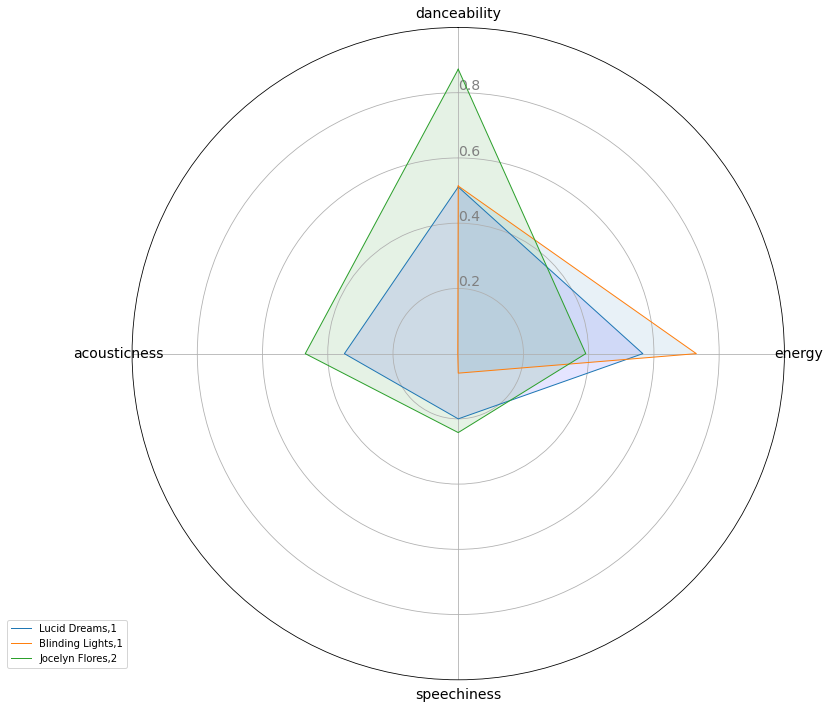

In [19]:
# ------- PART 1: Create background
 
# number of variable
categories=list(radartble)[1:]
N = len(categories)
 
# #Splitting the circle into even parts and saving the angles
#What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1] #This completes the loop as plot is a circle
 
# Initialise the spider plot
#ax = plt.subplot(111, polar=True)
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, size = 14)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=14)
plt.ylim(0,1)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=radartble.loc[0].drop('Song Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Lucid Dreams,1")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=radartble.loc[3].drop('Song Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Blinding Lights,1")
ax.fill(angles, values, 'p', alpha=0.1)

# Ind5
values=radartble.loc[5].drop('Song Name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Jocelyn Flores,2")
ax.fill(angles, values, 'g', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0, 0.1))

#my_dpi=40
#plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

In [20]:
#Downloading Resultdf (merged Table) for PowerBI visualisation
from google.colab import files
resultdf.to_csv('PythonMerged.csv')
files.download('PythonMerged.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>